# **Santander Customer Transaction Prediction Dataset Analysis**

In this project, the tasks bellow are covered:
- Dataset analysis and visualizing
- Using a model for binary classification on validation data
- Feature selection using correlations
- Checking if the model can reach the first results using only selected features
- Rebuild the model to predict test samples with no true labels

*Dataset is available on Kaggle: https://www.kaggle.com/datasets/lakshmi25npathi/santander-customer-transaction-prediction-dataset*

In [158]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [159]:
df = pd.read_csv('train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [160]:
df.info()
print('shape: ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
shape:  (200000, 202)


In [161]:
# checking for null values
df.isna().sum().any()

False

In [162]:
df = df.drop('ID_code', axis=1)

Distribution of 4 random features:


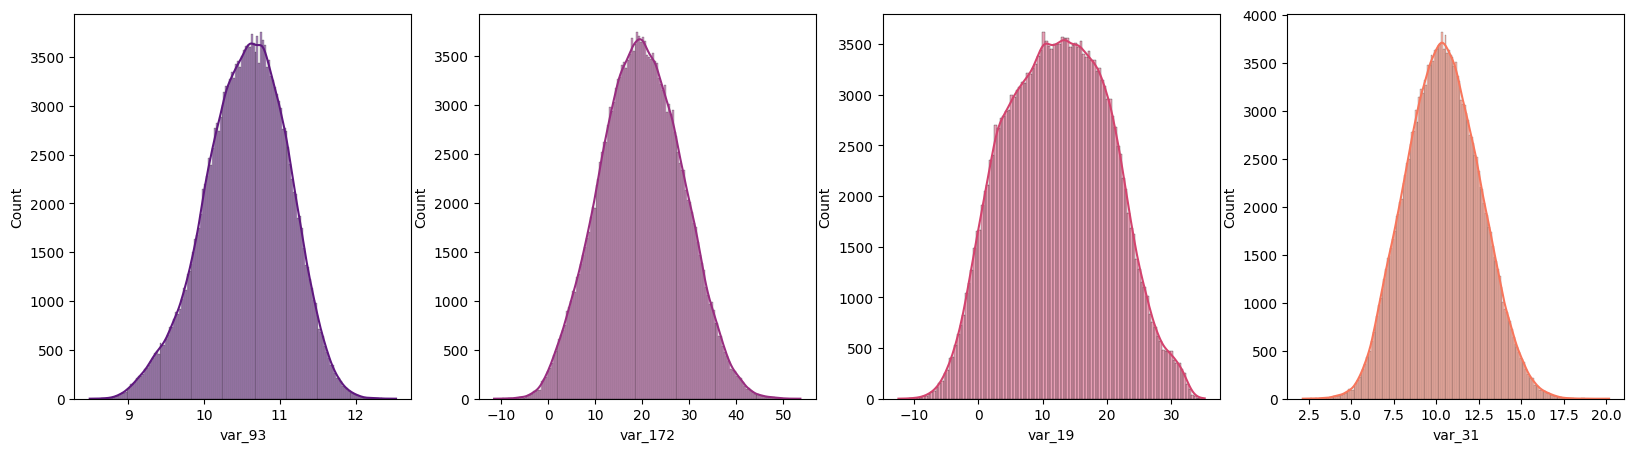

In [163]:
print('Distribution of 4 random features:')

palette = sns.color_palette('magma')
plt.figure(figsize=(20, 5))
for i in range(1, 5):
    idx = np.random.randint(1, 201)
    plt.subplot(1, 4, i)
    sns.histplot(df.iloc[:, idx], kde=True, color=palette[i])

<Axes: title={'center': 'Distribution of target'}, xlabel='target'>

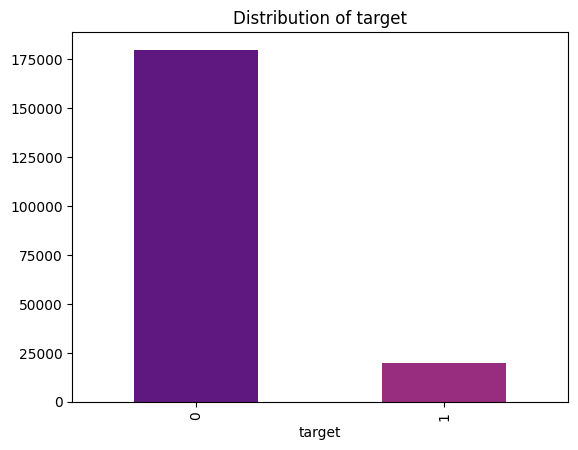

In [164]:
plt.title('Distribution of target')
df['target'].value_counts().plot(kind='bar', color=[palette[1], palette[2]])

In [165]:
# since the test dataset has no labels, train data is splitted into train and validation
X = df.drop('target', axis=1)
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [166]:
# scaling data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [167]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [168]:
# results on validation
y_pred_val = model.predict(X_val_scaled)
print(classification_report(y_val, y_pred_val))
print('\naccuracy: ', accuracy_score(y_val, y_pred_val, ))
print('precision: ', precision_score(y_val, y_pred_val))
print('recall: ', recall_score(y_val, y_pred_val))
print('f1-score: ', f1_score(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     35980
           1       0.29      0.78      0.42      4020

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000


accuracy:  0.7834
precision:  0.2865416436845008
recall:  0.7753731343283582
f1-score:  0.4184454289166331


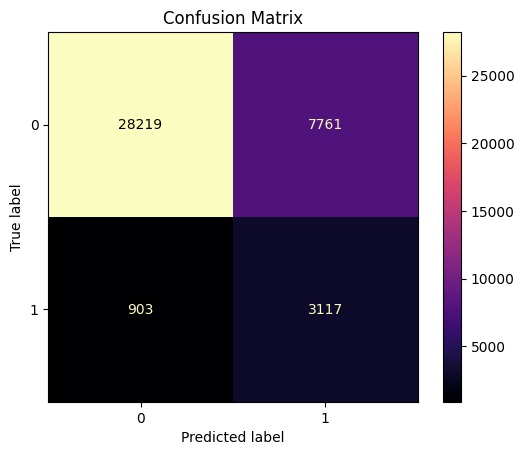

In [169]:
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=sns.color_palette('magma', as_cmap=True))
plt.title('Confusion Matrix')
plt.show()

In [170]:
# feature selection using correlation
corr_matrix = df.corr()
corr_with_target = corr_matrix['target'].abs().sort_values(ascending=False)
best_features = corr_with_target[corr_with_target > 0.03].index.tolist()
best_features.remove('target')
print('best selected features: ', best_features)
print('\nnumber of selected features: ', len(best_features))

"""
features are not really correlated with target.
Their correlation is not even more than 0.1, so the ones more than 0.03 are chosen.

""";

best selected features:  ['var_81', 'var_139', 'var_12', 'var_6', 'var_110', 'var_146', 'var_53', 'var_26', 'var_76', 'var_174', 'var_22', 'var_21', 'var_99', 'var_166', 'var_80', 'var_190', 'var_2', 'var_165', 'var_13', 'var_148', 'var_133', 'var_198', 'var_34', 'var_0', 'var_1', 'var_115', 'var_179', 'var_109', 'var_40', 'var_44', 'var_169', 'var_184', 'var_78', 'var_170', 'var_149', 'var_191', 'var_94', 'var_92', 'var_154', 'var_108', 'var_67', 'var_33', 'var_18', 'var_192', 'var_9', 'var_122', 'var_173', 'var_164', 'var_118', 'var_123', 'var_147', 'var_91', 'var_107', 'var_121', 'var_89', 'var_86', 'var_127', 'var_95', 'var_36', 'var_75', 'var_172', 'var_155', 'var_177', 'var_35', 'var_87', 'var_197', 'var_93', 'var_56', 'var_188', 'var_71', 'var_106', 'var_162', 'var_157', 'var_131', 'var_48', 'var_163', 'var_180', 'var_5', 'var_119', 'var_145', 'var_167', 'var_49', 'var_32', 'var_186']

number of selected features:  84


In [182]:
# checking results using only selected features to compare with the first model
X = df[best_features]
y = df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train_scaled, y_train)

y_pred_val = clf.predict(X_val_scaled)
print(classification_report(y_val, y_pred_val))
print('\naccuracy: ', accuracy_score(y_val, y_pred_val, ))
print('precision: ', precision_score(y_val, y_pred_val))
print('recall: ', recall_score(y_val, y_pred_val))
print('f1-score: ', f1_score(y_val, y_pred_val))

"""
It seems that even with only 84 features out of 200, almost same results can be achieved.

""";

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     35980
           1       0.26      0.75      0.39      4020

    accuracy                           0.76     40000
   macro avg       0.61      0.76      0.62     40000
weighted avg       0.89      0.76      0.81     40000


accuracy:  0.762675
precision:  0.26288883112381944
recall:  0.754726368159204
f1-score:  0.3899492320544952


In [188]:
# using first model to test it on the real test data
X_test = pd.read_csv('test.csv')
X_test = X_test.drop('ID_code', axis=1)

X_test_scaled = sc.transform(X_test)

y_pred = model.predict(X_test_scaled)

prediction = pd.DataFrame(y_pred, columns=['prediction'])
prediction.head()

,prediction
0,1
1,1
2,0
3,1
4,0


<Axes: title={'center': 'Distribution of Prediction'}, xlabel='prediction'>

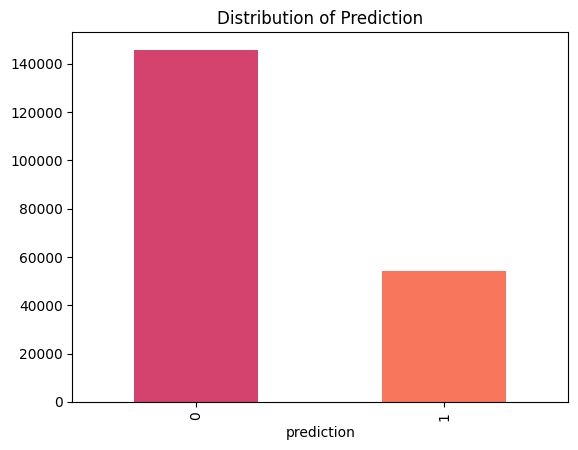

In [189]:
plt.title('Distribution of Prediction')
prediction['prediction'].value_counts().plot(kind='bar', color=[palette[3], palette[4]])